# Practice

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


## Splitting dataset into test and train sets

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

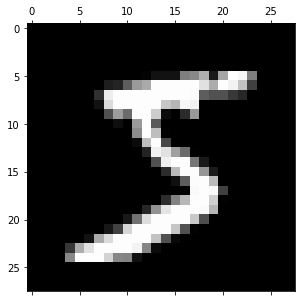

In [8]:
plt.matshow(X_train[0])
plt.gray()

## Reshaping Data

In [9]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Training Neural Network

In [11]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4616 - accuracy: 0.8796
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3026 - accuracy: 0.9152
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2824 - accuracy: 0.9201
Epoch 4/20
1875/1875 [==============================] - 2s 974us/step - loss: 0.2723 - accuracy: 0.9243
Epoch 5/20
1875/1875 [==============================] - 2s 970us/step - loss: 0.2666 - accuracy: 0.9258
Epoch 6/20
1875/1875 [==============================] - 2s 971us/step - loss: 0.2616 - accuracy: 0.9270
Epoch 7/20
1875/1875 [==============================] - 2s 970us/step - loss: 0.2580 - accuracy: 0.9288
Epoch 8/20
1875/1875 [==============================] - 2s 990us/step - loss: 0.2552 - accuracy: 0.9296
Epoch 9/20
1875/1875 [==============================] - 2s 972us/step - loss: 0.2527 - accuracy: 0.9305
Epoch 10/20
1875/1875 [==============================] - 2s 960us/step

In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 849us/step - loss: 0.2699 - accuracy: 0.9270


[0.2699219584465027, 0.9269999861717224]

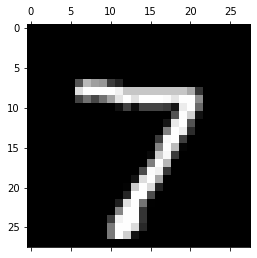

In [13]:
plt.matshow(X_test[0])

## Predicting using the model

In [14]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 705us/step


array([2.2060930e-04, 2.6180300e-10, 9.3210262e-04, 9.6282834e-01,
       4.7793338e-04, 1.4302155e-01, 2.0912444e-10, 9.9986565e-01,
       6.7466274e-02, 6.1676502e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Plotting Confusion Matrix

In [18]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    2,    1,    8,    8,    4,    1,    0],
       [   0, 1109,    4,    3,    0,    1,    3,    2,   13,    0],
       [   4,    9,  918,   18,    7,    5,   10,    9,   48,    4],
       [   2,    0,   14,  927,    0,   22,    2,   10,   26,    7],
       [   1,    1,    6,    3,  903,    0,   10,    6,   11,   41],
       [   7,    2,    2,   37,    6,  786,   13,    8,   28,    3],
       [  11,    3,    9,    1,    7,   16,  908,    1,    2,    0],
       [   1,    5,   21,    8,    3,    2,    0,  951,    4,   33],
       [   5,    6,    5,   20,    7,   25,    8,    8,  882,    8],
       [   8,    7,    1,    9,   17,    7,    0,   21,    9,  930]])>

Text(69.0, 0.5, 'Truth')

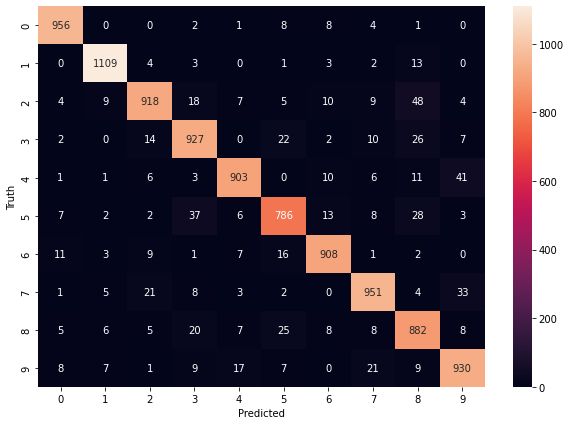

In [19]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Training Neural Network with a hidden layer

In [20]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2760 - accuracy: 0.9211
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1220 - accuracy: 0.9638
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0846 - accuracy: 0.9754
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9809
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0500 - accuracy: 0.9842
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0400 - accuracy: 0.9875
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0332 - accuracy: 0.9900
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.018

In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9804


[0.10046468675136566, 0.980400025844574]

## Plotting Confusion Matrix

313/313 [==============================] - 0s 886us/step


Text(69.0, 0.5, 'Truth')

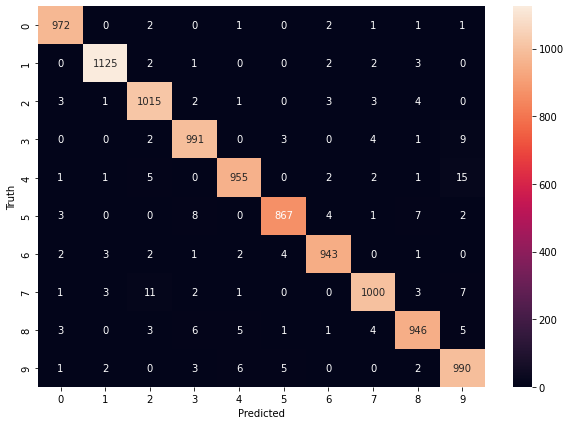

In [22]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Reshaping data at train time itself

In [23]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2825 - accuracy: 0.9196
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1318 - accuracy: 0.9609
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0915 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0690 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0555 - accuracy: 0.9823


In [25]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2698 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1232 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0849 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0632 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0520 - accuracy: 0.9839
